In [1]:
import pandas as pd

home_data = pd.read_csv('housing.csv',usecols = ['longitude','latitude','median_house_value']) 
home_data.head()

,longitude,latitude,median_house_value
0,-122.23,37.88,452600.0
1,-122.22,37.86,358500.0
2,-122.24,37.85,352100.0
3,-122.25,37.85,341300.0
4,-122.25,37.85,342200.0


<Axes: xlabel='longitude', ylabel='latitude'>

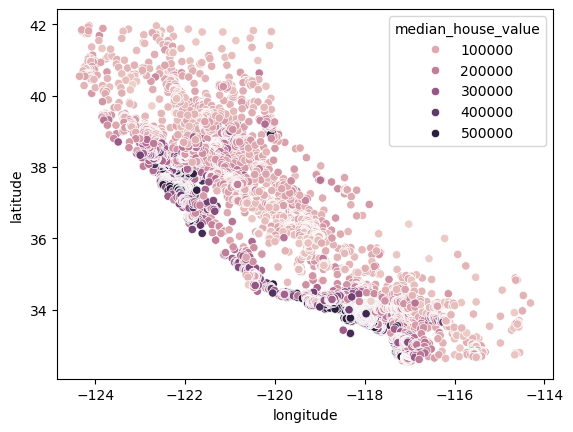

In [2]:
import seaborn as sns 

sns.scatterplot(data = home_data, x = 'longitude', y ='latitude', hue = 'median_house_value') 

In [4]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(home_data[['latitude','longitude']] ,home_data[['median_house_value']], test_size = 0.33,random_state=0) 

In [5]:
from sklearn import preprocessing 
X_train_norm = preprocessing.normalize(X_train) 
X_test_norm = preprocessing.normalize(X_test) 

In [7]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, random_state = 0, n_init='auto') 
kmeans.fit(X_train_norm) 

C:\Users\aa131\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\aa131\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\aa131\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\aa131\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^

KMeans(n_clusters=3, random_state=0)

<Axes: xlabel='longitude', ylabel='latitude'>

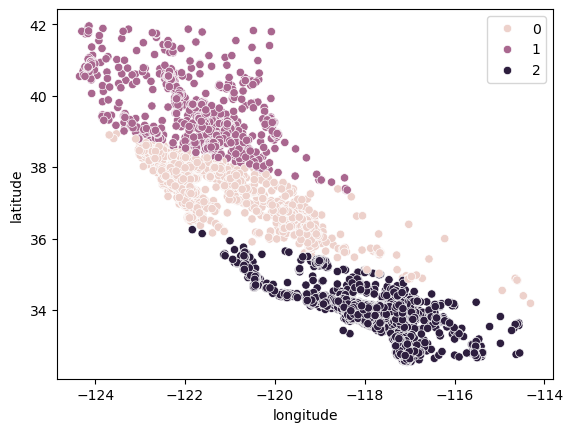

In [10]:
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = kmeans.labels_) 

<Axes: ylabel='median_house_value'>

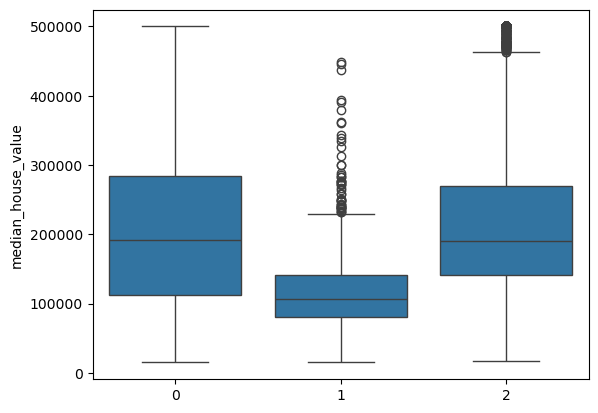

In [12]:
sns.boxplot (x = kmeans.labels_, y = y_train['median_house_value']) 

In [14]:
from sklearn.metrics import silhouette_score

silhouette_score(X_train_norm, kmeans.labels_, metric = 'euclidean') 

np.float64(0.7499371920703547)

In [19]:
K = range(2,8) 
fits = []
score = [] 

for k in K: 
    model =KMeans(n_clusters = k, random_state = 0, n_init ='auto').fit(X_train_norm) 
    fits.append(model) 
    score.append(silhouette_score(X_train_norm, model.labels_, metric ='euclidean')) 

<Axes: xlabel='longitude', ylabel='latitude'>

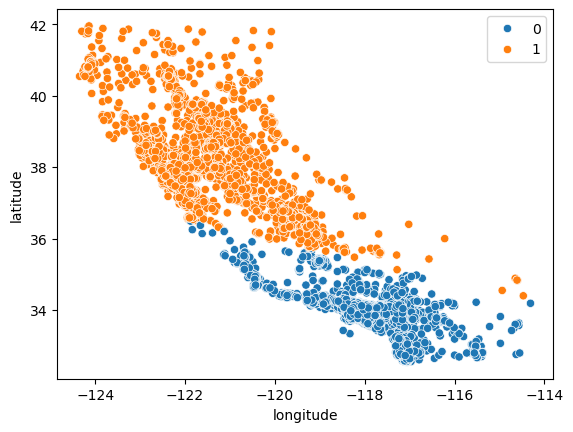

In [25]:
sns.scatterplot(data = X_train, x = 'longitude',y = 'latitude', hue = fits[0].labels_) 

<Axes: xlabel='longitude', ylabel='latitude'>

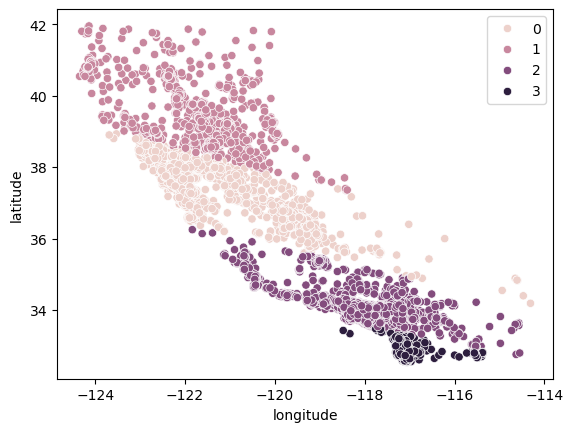

In [27]:
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = fits[2].labels_) 

<Axes: xlabel='longitude', ylabel='latitude'>

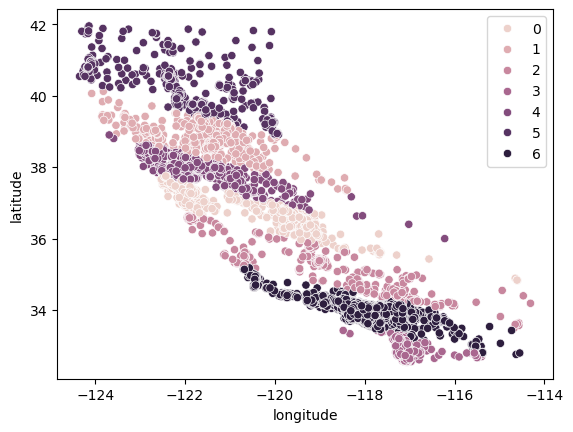

In [36]:
sns.scatterplot(data = X_train, x = 'longitude' , y = 'latitude', hue = fits[5].labels_) 

<Axes: >

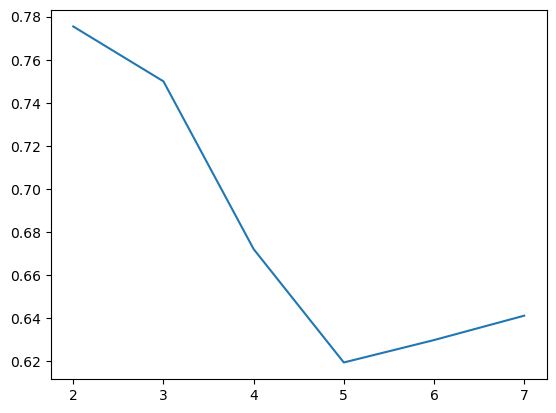

In [28]:
sns.lineplot(x = K , y = score) 

<Axes: xlabel='longitude', ylabel='latitude'>

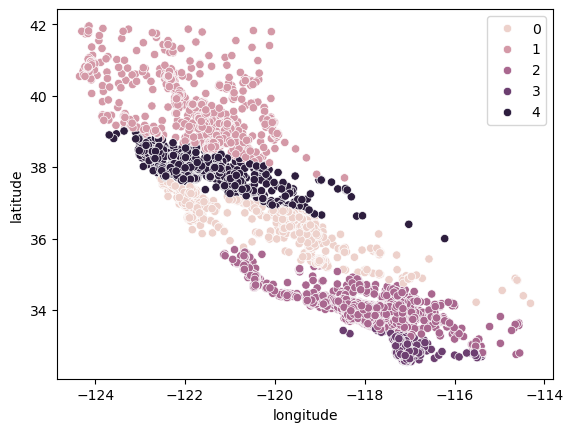

In [37]:
sns.scatterplot(data = X_train, x = 'longitude' , y = 'latitude', hue = fits[3].labels_) 

<Axes: ylabel='median_house_value'>

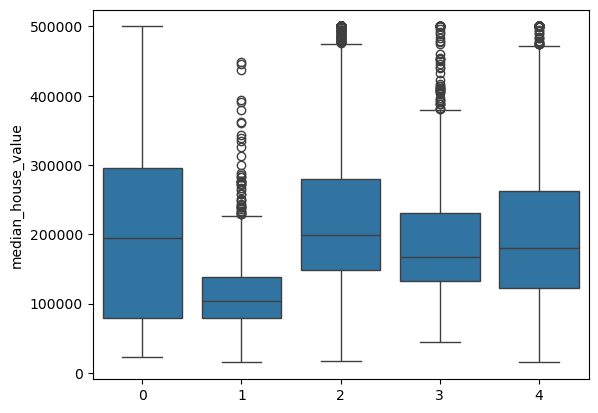

In [38]:
sns.boxplot(x = fits[3].labels_, y = y_train['median_house_value']) 